In [1]:
# from torch.optim import Adam
# import torch.multiprocessing as mp

# from engines.AuxTrainer import AuxTrainer
# from engines.ClsTrainer import ClsTrainer
# from engines.SegTrainer import SegTrainer
# from model.loss import getTotalLoss
# from data_loader.dataset import getDataloaders
# from utils.util import initModel, ddp_setup, ddp_cleanup
from utils.util import SDF

# from configs import CONF

import torch
import numpy as np
import matplotlib.pyplot as plt
# from scipy.ndimage import distance_transform_edt

# import torch.nn.functional as F
# import time

# from torch.nn import BCEWithLogitsLoss

# from model.loss import SDMQuadLoss

In [38]:
def create_circular_mask(N, H, W, radius):
    """
    Create a batch of circular masks.

    Args:
        N (int): Batch size.
        H (int): Height of the mask.
        W (int): Width of the mask.
        radius (int): Radius of the circle.

    Returns:
        torch.Tensor: A tensor of shape (N, H, W) containing circular masks.
    """
    Y, X = np.ogrid[:H, :W]
    center_y, center_x = H // 2, W // 2
    distance = np.sqrt((X - center_x)**2 + (Y - center_y)**2)
    mask = distance <= radius

    # Repeat the mask for each item in the batch
    batch_mask = np.tile(mask, (N, 1, 1))
    return torch.tensor(batch_mask, dtype = torch.float32).to('cuda:0')

In [39]:
N = 16 
H, W = 512, 512 
radius = 100 

circular_mask = create_circular_mask(N, H, W, radius).unsqueeze(1)
print(circular_mask.shape)

torch.Size([16, 1, 512, 512])


In [63]:
SDM = SDF(circular_mask, kernel_size = 11)

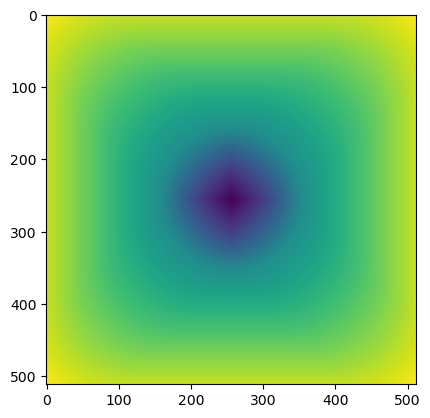

In [64]:
plt.imshow(SDM[0][0].cpu().detach().numpy(), cmap='viridis')

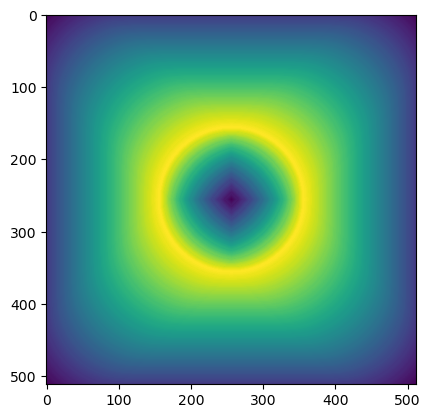

In [66]:
# SDM = torch.clamp(SDM, min=-0.5, max=0.5)
SDM = 2 - torch.abs(SDM)
# SDM = torch.clamp(SDM, min=1.9, max=2)
plt.imshow(SDM[0][0].cpu().detach().numpy(), cmap='viridis')

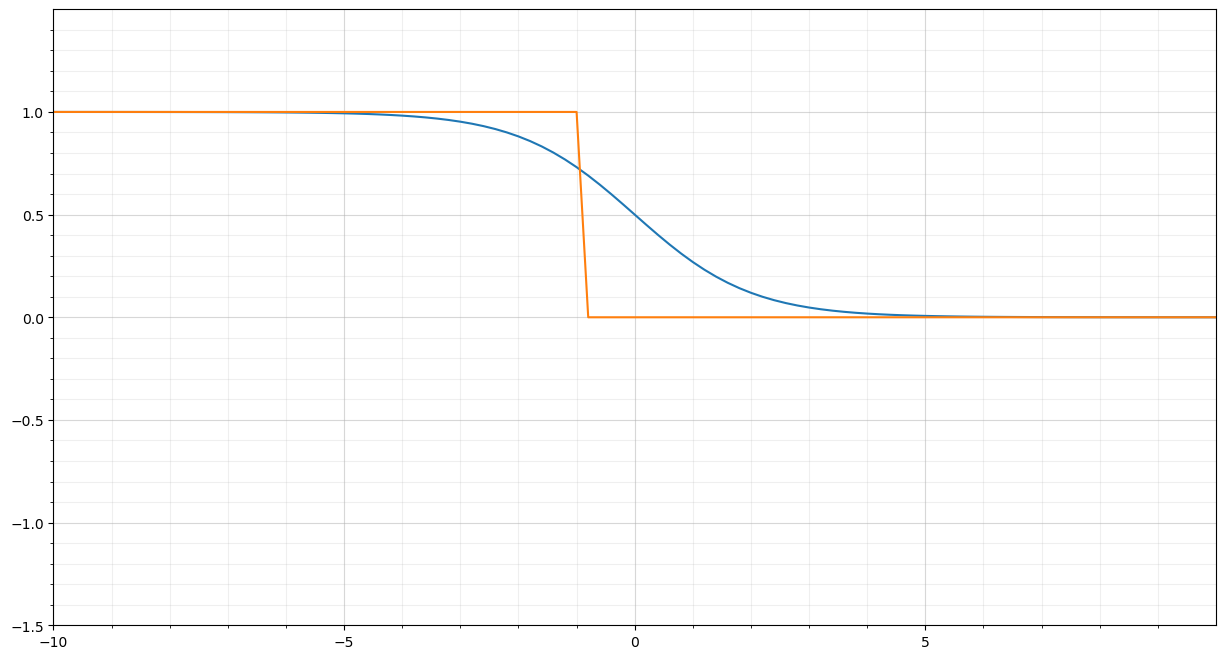

In [82]:
x = torch.tensor(np.linspace(-10,10,101))
k = 1000
y1 =  torch.sigmoid(-1*x) 
y2 = torch.relu(torch.sign(torch.sigmoid(-1*x) - 0.7))
y3 = torch.tanh(x)

fig, ax = plt.subplots(figsize = (15,8))
ax.set_xticks(np.arange(-10, 10, 5))
ax.set_xticks(np.arange(-10, 10, 1), minor=True)
ax.set_yticks(np.arange(-1.5, 1.5, 0.5))
ax.set_yticks(np.arange(-1.5, 1.5, 0.1), minor=True)
ax.set_xlim([-10, 10])
ax.set_ylim([-1.5, 1.5])
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.plot(x, y1)
ax.plot(x, y2)
# ax.plot(x, y3)